<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Current-Problems" data-toc-modified-id="Current-Problems-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Current Problems</a></span></li><li><span><a href="#Todo:" data-toc-modified-id="Todo:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Todo:</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Initialize" data-toc-modified-id="Initialize-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Initialize</a></span><ul class="toc-item"><li><span><a href="#Parameters" data-toc-modified-id="Parameters-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Vizualize-and-theoretical-solution" data-toc-modified-id="Vizualize-and-theoretical-solution-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Vizualize and theoretical solution</a></span></li></ul></li><li><span><a href="#Routines-to-implement" data-toc-modified-id="Routines-to-implement-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Routines to implement</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Run</a></span><ul class="toc-item"><li><span><a href="#Init-Graph" data-toc-modified-id="Init-Graph-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Init Graph</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Run</a></span></li><li><span><a href="#Analyze-output" data-toc-modified-id="Analyze-output-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Analyze output</a></span></li></ul></li><li><span><a href="#Debug-Line-Search" data-toc-modified-id="Debug-Line-Search-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Debug Line Search</a></span></li><li><span><a href="#Useful-nx-lines" data-toc-modified-id="Useful-nx-lines-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Useful nx lines</a></span></li></ul></div>

# Current Problems

# Todo:

- Include good vizualization of the total cost function (from previous MATLAB/Python work) in order to see what the theoretical solution is and to tune your parameters properly

- Find the good data strcutre to represent the flows over the graph

- Transform Graph into objects, to make it easier to use? 

- Stopping criterion for FW

- Introduce node potentials properly (one is the offset for the Demand function, the other one is the potential! 


- Include the vertex potential and the inverse demand shift: two different things!

# Load

In [201]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from routines_icu import *
from helpers_icu import *
import cvxpy as cp
from FW_icu import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Initialize 

## Parameters

In [2]:
#parameters
alpha=0.15
beta=4
POTENTIAL_SHIFT=90
INVERSE_DEMAND_SHIFT=80

ZC_EDGE=1

In [3]:
#to adapt
#to be read from file if necessary

k_list=[10,10,3,10,ZC_EDGE] 
l_list=[10,10,1,10,0]
t_list=[10,10,10,10,ZC_EDGE]
phi_list=[phi(l_list[i],t_list[i]) for i in range(len(l_list))]
is_negative=[0,0,1,0,0]

nodes_pots=[('2_p',POTENTIAL_SHIFT)]

## Vizualize and theoretical solution

In [5]:
x_12=np.linspace(0,N,100)

C1=BPR(phi_list[0],x_12,k_list[0])
C2=-BPR(phi_list[2],x_12,k_list[2])+INVERSE_DEMAND_SHIFT
KK=C1-C2

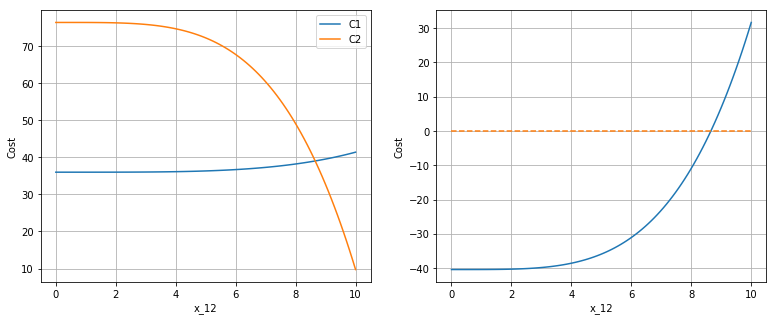

In [7]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(x_12,C1,label=("C1"))
plt.plot(x_12,C2,label=("C2"))
plt.xlabel("x_12")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(x_12,KK,label="Total Cost")
plt.plot(x_12,np.ones(x_12.shape)*0,'--')
plt.xlabel("x_12")
plt.ylabel("Cost")
plt.grid(True)

In [8]:
C_T=BPR_int(phi_list[0],x_12,k_list[0])+BPR_int(phi_list[2],x_12,k_list[2])-INVERSE_DEMAND_SHIFT*x_12

Text(0, 0.5, 'Integral Cost')

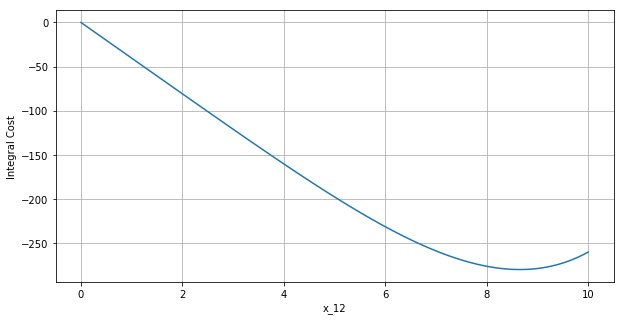

In [9]:
plt.figure(figsize=(10,5))
plt.plot(x_12,C_T)
plt.grid(True)
plt.xlabel("x_12")
plt.ylabel("Integral Cost")

# Routines to implement

In [ ]:
# def stopping_criterion(x_k,y_k):

# Run

## Init Graph

In [253]:
G=nx.DiGraph()

nodes_list=['1','2','2_p','R']
edge_list=[('1','2'),('2','1'),('2','2_p'),('1','R'),('1','2_p')]

G.add_nodes_from(nodes_list)
G.add_edges_from(edge_list)


G=initEdgeAttr(G,edge_list,k_list,phi_list,is_negative)

G=init_flows(G)

G=initNodeAttr(G,nodes_pots)
G=update_costs(G,INVERSE_DEMAND_SHIFT)

dummy_nodes=dict()
dummy_nodes['2_p']='2'

OD=dict()
N=10
OD[('1','2_p')]=N

print(G.nodes.data())

for e in G.edges():
    print(e," --- ",G.edges[e])

print(OD)

[('1', {'ri': 0}), ('2', {'ri': 0}), ('2_p', {'pot': 90, 'ri': 0}), ('R', {'ri': 0})]
('1', '2')  ---  {'k': 10, 'phi': 36.0, 'sign': 1, 'f_m': 0, 'f_r': 0, 'cost': 36.0}
('1', 'R')  ---  {'k': 10, 'phi': 36.0, 'sign': 1, 'f_m': 0, 'f_r': 10, 'cost': 36.0}
('1', '2_p')  ---  {'k': 1, 'phi': 0.0, 'sign': 1, 'f_m': 0, 'f_r': 0, 'cost': 90.0}
('2', '1')  ---  {'k': 10, 'phi': 36.0, 'sign': 1, 'f_m': 0, 'f_r': 0, 'cost': 36.0}
('2', '2_p')  ---  {'k': 3, 'phi': 3.6, 'sign': -1, 'f_m': 0, 'f_r': 0, 'cost': 13.599999999999994}
{('1', '2_p'): 10}


## Run

In [254]:
G_k,OD=FW(G,OD,edge_list,dummy_nodes)

###############################
iteration #  1
oD: {('1', '2_p'): 10, ('1', 'R'): 0, ('2', 'R'): 0, ('2_p', 'R'): 0}
AON, (o,d): 1 2_p
optimal_inaccurate
ALPHA: 0.9984584613277211
###############################
iteration #  2
oD: {('1', '2_p'): 10, ('1', 'R'): 0, ('2', 'R'): 9.98458461327721, ('2_p', 'R'): 0}
AON, (o,d): 1 2_p
AON, (o,d): 2 R
optimal_inaccurate
ALPHA: 1.6517170569522003e-07
###############################
iteration #  3
oD: {('1', '2_p'): 10, ('1', 'R'): 0, ('2', 'R'): 9.98458296410634, ('2_p', 'R'): 0}
AON, (o,d): 1 2_p
AON, (o,d): 2 R
optimal_inaccurate
ALPHA: 5.833653387941463e-07
###############################
iteration #  4
oD: {('1', '2_p'): 10, ('1', 'R'): 0, ('2', 'R'): 9.984577139446715, ('2_p', 'R'): 0}
AON, (o,d): 1 2_p
AON, (o,d): 2 R
optimal_inaccurate
ALPHA: 4.589809119878312e-05
###############################
iteration #  5
oD: {('1', '2_p'): 10, ('1', 'R'): 0, ('2', 'R'): 9.984118866414589, ('2_p', 'R'): 0}
AON, (o,d): 1 2_p
AON, (o,d): 2 R
optimal_i

In [245]:
OD

{('1', '2_p'): 10,
 ('1', 'R'): 0,
 ('2', 'R'): 9.983944345833923,
 ('2_p', 'R'): 0}

In [246]:
G_end=G_k[-1]
for e in G_end.edges():
    print(e," : ",G_end[e[0]][e[1]]['f_m']+G_end[e[0]][e[1]]['f_r'])

('1', '2')  :  9.983942979939064
('1', 'R')  :  0.01605602790929861
('1', '2_p')  :  0.0006416333263573945
('2', '1')  :  0.0006406411747201725
('2', '2_p')  :  9.983942979939064


## Analyze output

- Don't forget: the capacities are a mirror for the ri_k
- think about proper initialization
- What is the correct way to think about flows? 1. should we split them in m and r? 2. In order to compute the ri_k, I am assuming we should put into it only the flow that goes onto the network (i.e. neglect all the edges that flow directly into dummy node). 
- it seemed like the thing stopped giving the right answer (8.xxx as soon as I introduced a change in the way the ri_k were computed)
- What is happening is the following: the ALPHA is good at the beginning (first iteration) but then it goes super small for some reason: it does not include the new suggestions. Therefore, todo: include y_k as an attribute to the edges of G, so that you can actually see its evolution and the "suggested assignment" by AON at every step. Also, re-check the way you compute the ri_k.

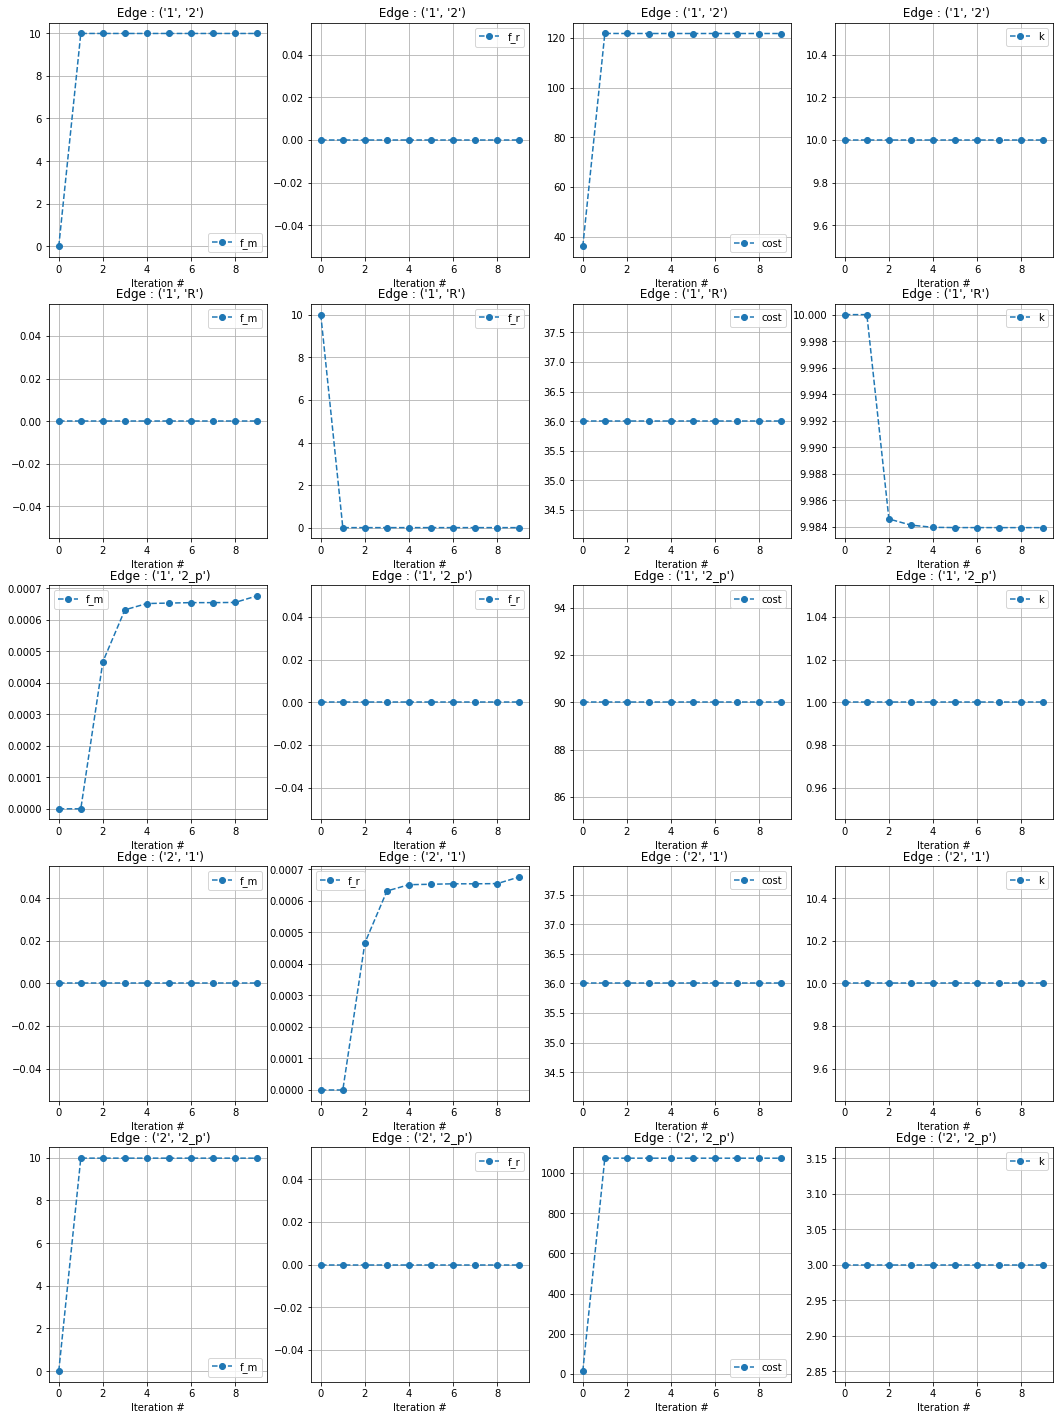

In [242]:
attrs=['f_m', 'f_r','cost','k']
plot_edge_attrs(G_k,attrs)

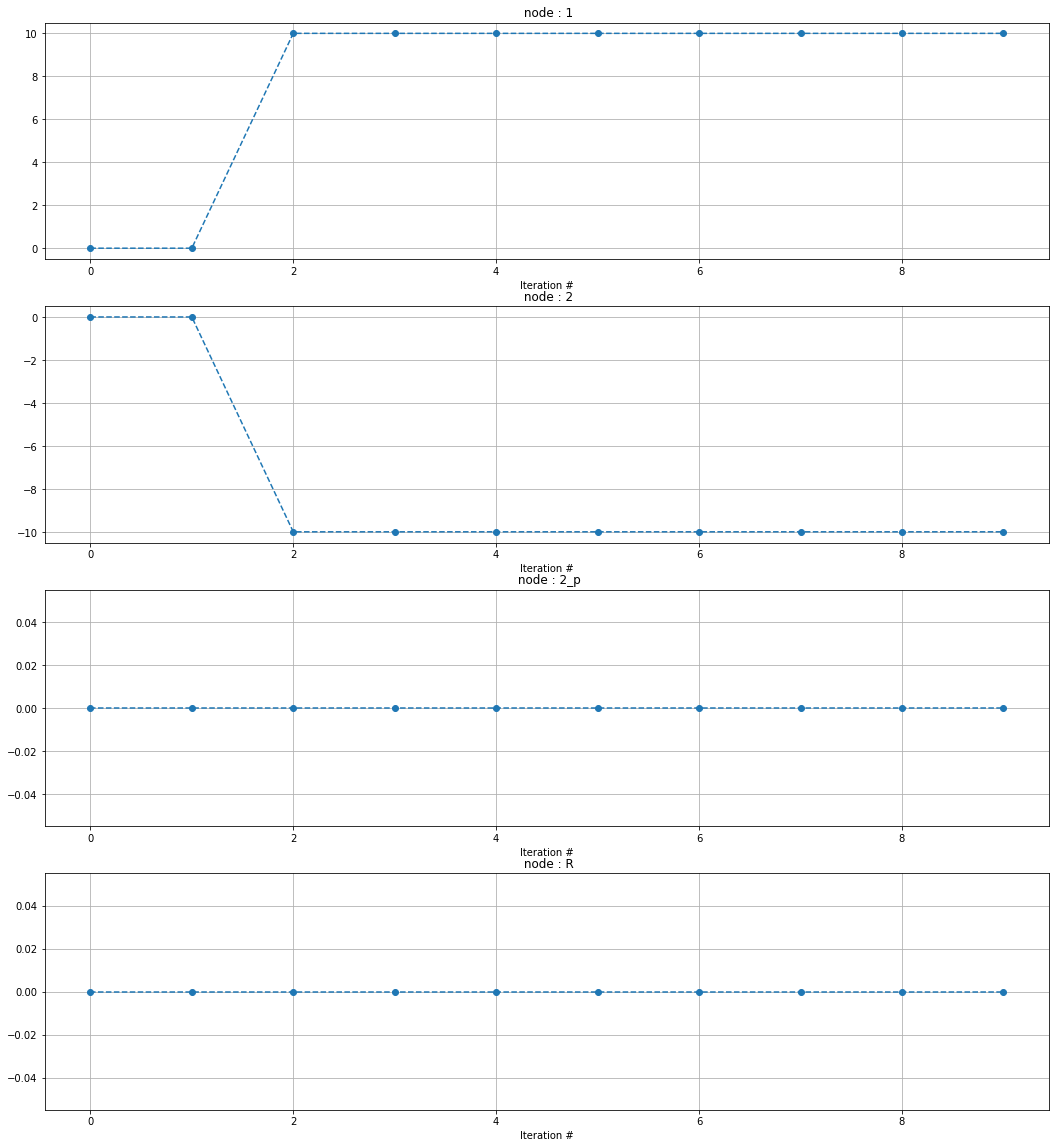

In [241]:
plot_node_attrs(G_k,['ri'])

# Debug Line Search

- It started working when removing the node potential from the toal cost. Any explanation? Should we remove it or not? 

# Useful nx lines

In [109]:
nx.get_edge_attributes(G,'f')

{('1', '2'): 0, ('1', 'R'): 0, ('2', '1'): 0, ('2', '2_p'): 0}

In [9]:
G.nodes.data()

NodeDataView({'1': {}, '2': {}, '2_p': {'pot': 90}, 'R': {}})

In [12]:
G.edges.data()

OutEdgeDataView([('1', '2', {'k': 1, 'phi': 36.0, 'sign': 1, 'f': 0, 'cost': 36.0}), ('1', 'R', {'k': 10, 'phi': 36.0, 'sign': 1, 'f': 0, 'cost': 36.0}), ('2', '1', {'k': 10, 'phi': 36.0, 'sign': 1, 'f': 0, 'cost': 36.0}), ('2', '2_p', {'k': 10, 'phi': 36.0, 'sign': -1, 'f': 0, 'cost': -36.0})])

In [51]:
G['1']['2']

{'f': 0, 'k': 1, 'phi': 36.0, 'sign': 1, 'cost': 36.0}